In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def get_data(filename):
    df = pd.read_csv(filename, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index('Datetime')
    df = df.drop(['Date', 'Time'], axis=1)
    return df

In [46]:
usdjpy = get_data('USDJPY_D1.csv')
usdjpy = usdjpy.iloc[-175:]
usdcad = get_data('USDCAD_D1.csv')
usdcad = usdcad.iloc[-175:]
eurusd = get_data('EURUSD_D1.csv')
eurusd = eurusd.iloc[-175:]

df = pd.DataFrame()
df['usdjpy'] = usdjpy.Close
df['usdcad'] = usdcad.Close
df['eurusd'] = eurusd.Close

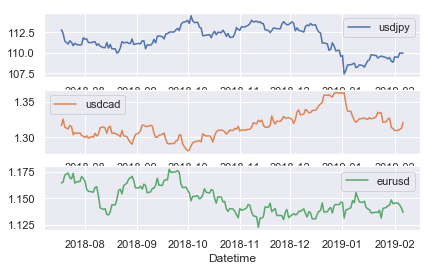

In [48]:
ax = df.plot(subplots=True,
             layout=(3,1),
             sharex=False,
             sharey=False,
            )
plt.show()

/anaconda2/envs/python3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


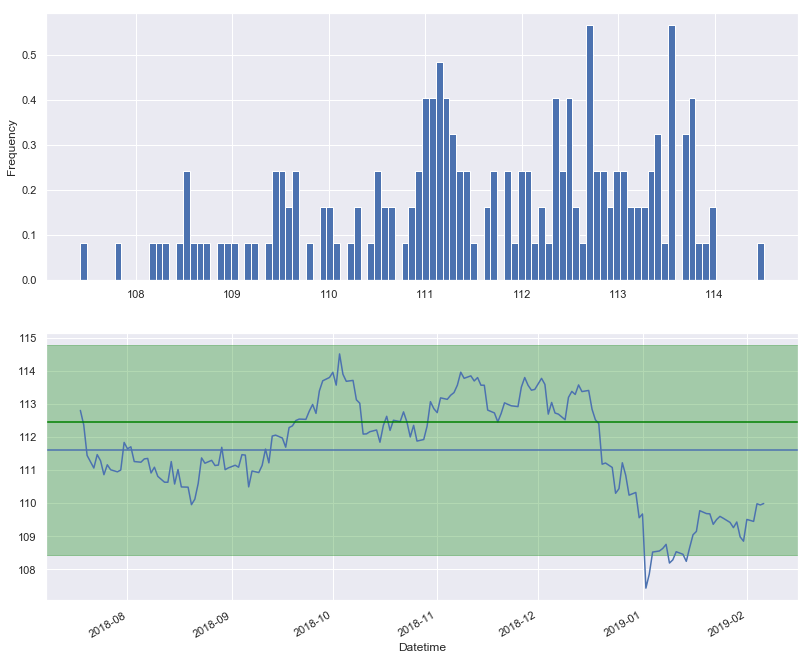

In [54]:
fig, axes = plt.subplots(2,1, figsize=(12,12))

mean = np.mean(usdjpy.Close)
std = np.std(usdjpy.Close)
ax1 = usdjpy.Close.plot(kind='hist', bins=100, normed=True, ax=axes[0])
ax2 = usdjpy.Close.plot(ax=axes[1])
ax2 = plt.axhline(112.454, color='green')
ax2 = plt.axhline(mean)
ax2 = plt.axhspan(mean+(2*std), mean-(2*std), color='green', alpha=0.3)
plt.show()

In [52]:
eurusd.Close.value_counts().sort_values(ascending=False)

1.13758    3
1.13121    2
1.13995    2
1.15238    1
1.15769    1
1.16437    1
1.14627    1
1.16451    1
1.13994    1
1.15330    1
1.14726    1
1.13718    1
1.16019    1
1.15828    1
1.15762    1
1.15670    1
1.17093    1
1.13416    1
1.13614    1
1.16845    1
1.13541    1
1.16234    1
1.13920    1
1.16449    1
1.13355    1
1.15011    1
1.13860    1
1.13558    1
1.13688    1
1.14414    1
          ..
1.13126    1
1.17523    1
1.16654    1
1.16740    1
1.14032    1
1.17403    1
1.13374    1
1.14918    1
1.16591    1
1.14141    1
1.17071    1
1.15571    1
1.14102    1
1.13145    1
1.17196    1
1.14131    1
1.14185    1
1.15046    1
1.13331    1
1.14612    1
1.14348    1
1.15541    1
1.13109    1
1.16559    1
1.14764    1
1.12969    1
1.14706    1
1.16344    1
1.17379    1
1.14565    1
Name: Close, Length: 171, dtype: int64

In [51]:
usdjpy.Close.value_counts().sort_values(ascending=False)

112.454    2
113.563    2
112.689    2
112.984    1
111.211    1
111.076    1
109.500    1
109.539    1
108.626    1
111.148    1
109.951    1
113.795    1
109.769    1
112.624    1
110.591    1
112.837    1
111.204    1
110.921    1
110.944    1
111.465    1
110.909    1
113.437    1
108.237    1
109.673    1
113.588    1
109.597    1
111.365    1
107.427    1
111.999    1
113.195    1
          ..
112.197    1
112.725    1
113.709    1
111.839    1
113.797    1
113.284    1
112.344    1
112.157    1
110.969    1
112.209    1
110.295    1
113.505    1
112.462    1
108.451    1
113.796    1
113.566    1
112.539    1
112.711    1
113.031    1
112.324    1
113.957    1
112.335    1
110.999    1
113.376    1
111.291    1
111.084    1
111.833    1
112.855    1
109.357    1
107.849    1
Name: Close, Length: 172, dtype: int64

In [37]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2018-07-18 to 2019-02-06
Data columns (total 1 columns):
Close    175 non-null float64
dtypes: float64(1)
memory usage: 2.7 KB


In [40]:
prices = pd.Series(usdjpy.Close)

# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(prices)

# Print the seasonality component
print(decomposition.seasonal)

# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None